In [1]:
# 패키지 import 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
import os
import json 
import matplotlib.pyplot as plt
import shutil

In [108]:
len(train)

5767

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0

In [3]:
data_path = 'G:\\내 드라이브\\0.AIFFEL\\datatthon\\data (1)'
train = glob(data_path + '\\train\\train\\*')
train = train[:-1] ## desktop.ini 파일 때문에...

In [45]:
test_path = 'G:\\내 드라이브\\0.AIFFEL\\datatthon\\data (1)\\train\\3파프리카\\risk2중기\\10462'
test_json = json.load(open(glob(test_path+'/*.json')[0], 'r'))
test_img = cv2.imread(glob(test_path+'/*.jpg')[0])
test_csv = pd.read_csv(glob(test_path+'/*.csv')[0])
test_json['annotations']['disease']

'a9'

In [6]:
# visualize bbox
def img_show(test_json, test_img, figsize = (7,7)):
    #plt.figure(figsize=figsize)
    points = test_json['annotations']['bbox'][0]
    part_points = test_json['annotations']['part']
    img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    img = cv2.rectangle(
        img,
        (int(points['x']), int(points['y'])),
        (int((points['x']+points['w'])), int((points['y']+points['h']))),
        (0, 255, 0),
        2
    )
    for part_point in part_points:
        point = part_point
        img = cv2.rectangle(
            img,
            (int(point['x']), int(point['y'])),
            (int((point['x']+point['w'])), int((point['y']+point['h']))),
            (255, 0, 0),
            1
        )
    # plt.imshow(img)
    # plt.show()
    return img

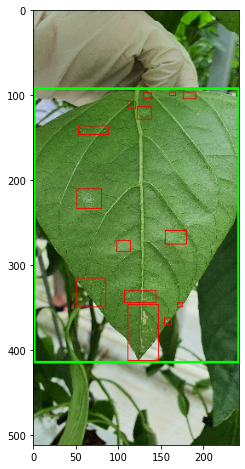

In [254]:
plt.imshow(img_show(test_json,test_img))
plt.show()

In [7]:
len(train)

5767

In [13]:
def sev_img_show(test_train, row_img_num, figsize = (8,8)):
    cnt = len(test_train)
    if cnt % row_img_num == 0:
        fig, axs = plt.subplots(figsize = figsize, ncols = row_img_num, nrows = cnt//row_img_num, constrained_layout=True)
    else: 
        fig, axs = plt.subplots(figsize = figsize, ncols = row_img_num, nrows = (cnt//row_img_num) + 1, constrained_layout=True)
        diff_figs = row_img_num*(cnt//row_img_num +1) - cnt
        for i in range(diff_figs):
            row = int((cnt + i)/row_img_num)
            col = (cnt + i) % (row_img_num)
            axs[row][col].axis('off')

    for i, filepath in tqdm(enumerate(test_train)):
        tmp_json = json.load(open(glob(filepath+'/*.json')[0], 'r'))
        tmp_img = cv2.imread(glob(filepath+'/*.jpg')[0])
        row = int(i/row_img_num)
        col = i % row_img_num
        img = img_show(tmp_json,tmp_img)
        axs[row][col].axis('off')
        axs[row][col].imshow(img)
        axs[row][col].set_title(filepath.split('\\')[-1]+'_'+str(tmp_json['annotations']['crop']) +'_'+ tmp_json['annotations']['disease'])
    plt.show()


10it [00:00, 55.78it/s]


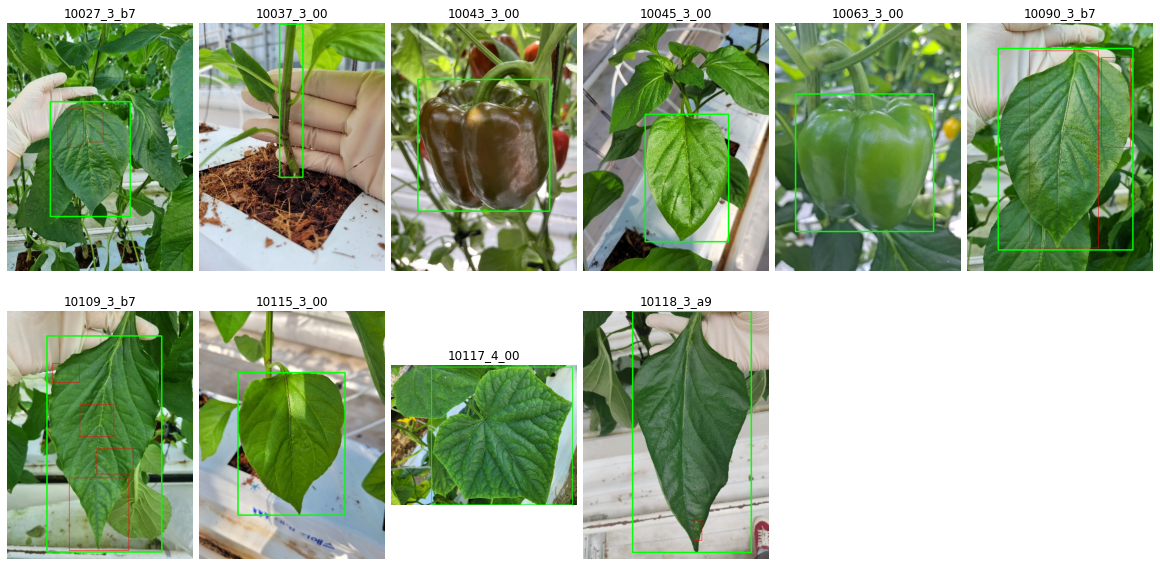

In [15]:
sev_img_show(train[0:10],6,figsize=(16,8))

In [304]:
len(train)

5767

In [28]:
def filter_list(train, key1, key2, type):
    filter_list =[]
    for filepath in tqdm(train):
        tmp_json = json.load(open(glob(filepath+'/*.json')[0], 'r'))
        tmp_img = cv2.imread(glob(filepath+'/*.jpg')[0])
        tmp_csv = pd.read_csv(glob(filepath+'/*.csv')[0])
        if tmp_json[key1][key2] == type:
            filter_list.append(filepath)
    return filter_list

In [100]:
tmp_json['description'].keys()

dict_keys(['date', 'image', 'task', 'width', 'time', 'region', 'height'])

In [27]:
# 코드값 한글로 변환하기 위한 Dictionary
# crop
crop_dict = {1 : '딸기',
             2 : '토마토',
             3 : '파프리카',
             4 : '오이', 
             5 : '고추',
             6 : '시설포도'
            }    
# risk
risk_dict = {0 : '정상',
             1 : '초기',
             2 : '중기',
             3 : '말기'}

task_dict = {0 : '정상',
             1 : '병해',
             2 : '생리장해',
            }## 보호제 처리 반응 삭제 tr_json_df['데이터종류'].unique() 3없음
# disease
disease_dict = {'00' : '정상',
                'a1' : '딸기잿빛곰팡이병-1',
                'a2' : '딸기흰가루병-1',
                'a3' : '오이노균병-1',
                'a4' : '오이흰가루병-1',
                'a5' : '토마토흰가루병-1',
                'a6' : '토마토잿빛곰팡이병-1',
                'a7' : '고추탄저병-1',
                'a8' : '고추흰가루병-1',
                'a9' : '파프리카흰가루병-1',
                'a10' : '파프리카잘록병-1',
                'a11' : '시설포도탄저병-1',
                'a12' : '시설포도노균병-1',
                'b1' : '냉해피해-2',
                'b2' : '열과-2',
                'b3' : '칼슘결핍-2',
                'b4' : '일소피해-2',
                'b5' : '축과병-2',
                'b6' : '다량원소결핍 (N)-2',
                'b7' : '다량원소결핍 (P)-2',
                'b8' : '다량원소결핍 (K)-2',
                # 'c1' : '딸기잿빛곰팡이병반응-2',
                # 'c2' : '딸기흰가루병반응-2',
                # 'c3' : '오이노균병반응-2',
                # 'c4' : '오이흰가루병반응-2',
                # 'c5' : '토마토흰가루병반응-2',
                # 'c6' : '토마토잿빛곰팡이병반응-2',
                # 'c7' : '고추탄저병반응-2',
                # 'c8' : '고추흰가루병반응-2',
                # 'c9' : '파프리카흰가루병반응-2',
                # 'c10' : '파프리카잘록병반응-2',
                # 'c11' : '시설포도탄저병반응-2',
                # 'c12' : '시설포도노균병반응-2'
               }

area_dict = {1 : '열매',
             2 : '꽃',
             3 : '잎',
             4 : '가지',
             5 : '줄기',
             6 : '뿌리',
             7 : '해충'}

grow_dict = {11: '유모기',
             12: '생장기',
             13: '착화/과실기',
             21: '발아기',
             22: '개화기',
             23: '신초생장기',
             24: '과실성숙기',
             25: '수확기',
             26: '휴먼기'}


In [34]:
crop_labels = list(crop_dict.keys())
risk_labels = list(risk_dict.keys())
disease_labels = list(disease_dict.keys())
area_labels = list(area_dict.keys())
grow_labels = list(grow_dict.keys())
task_labels = list(task_dict.keys())

100%|██████████| 5767/5767 [02:37<00:00, 36.60it/s]


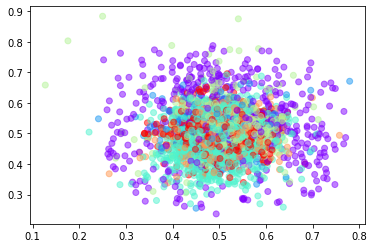

In [207]:
middlex = []
middley = []
part_num = []

size_crop_C = []
size_risk_C = []
size_disease_C = []
size_area_C = []
size_grow_C = []
size_task_C = []

for filepath in tqdm(train):
   tmp_json = json.load(open(glob(filepath +'//*.json')[0], 'r'))
   tmp_img = cv2.imread(glob(filepath +'//*.jpg')[0])
   tmp_csv = pd.read_csv(glob(filepath +'//*.csv')[0])
   points = tmp_json['annotations']['bbox'][0]
   middlex.append((points['x']+0.5*points['w'])/tmp_img.shape[1])
   middley.append((points['y']+0.5*points['h'])/tmp_img.shape[0])
   part_points = tmp_json['annotations']['part']
   part_num.append(len(part_points))
   size_crop_C.append(crop_labels.index(tmp_json['annotations']['crop']))
   size_risk_C.append(risk_labels.index(tmp_json['annotations']['risk']))
   size_disease_C.append(disease_labels.index(tmp_json['annotations']['disease']))
   size_area_C.append(area_labels.index(tmp_json['annotations']['area']))
   size_grow_C.append(grow_labels.index(tmp_json['annotations']['grow']))
   size_task_C.append(task_labels.index(tmp_json['description']['task']))


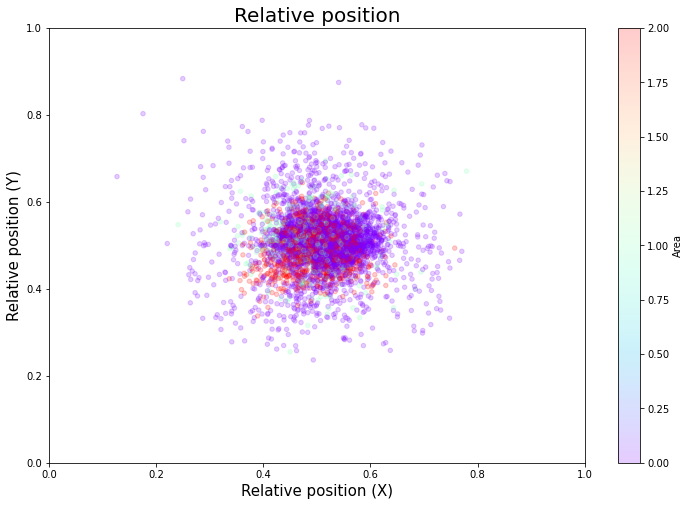

In [230]:
# Bbox 위치의 분포 (과수별)
figsize = (12,8)
plt.figure(figsize=figsize)
plt.scatter(middlex,middley,c = size_task_C, cmap='rainbow',alpha = 0.2, s= 20)
plt.colorbar(label = 'Area')
plt.xlabel('Relative position (X)', fontsize=15)
plt.ylabel('Relative position (Y)', fontsize=15)
plt.title("Relative position", fontsize=20) 
plt.xlim([0, 1]) 
plt.ylim([0, 1])
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

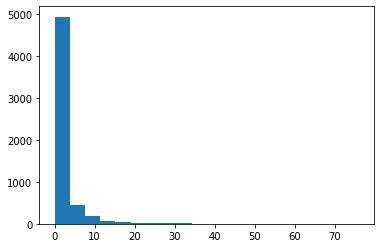

In [111]:
plt.hist(part_num, bins = 20)
plt.show

In [232]:
part_middlex_flat= []
part_middley_flat= []
part_size_crop_C = []
part_size_risk_C = []
part_size_disease_C = []
part_size_area_C = []
part_size_grow_C = []
part_size_task_C = []

for filepath in tqdm(train):
   tmp_json = json.load(open(glob(filepath +'//*.json')[0], 'r'))
   tmp_img = cv2.imread(glob(filepath +'//*.jpg')[0])
   tmp_csv = pd.read_csv(glob(filepath +'//*.csv')[0])
   points = tmp_json['annotations']['bbox'][0]
   part_points = tmp_json['annotations']['part']

   for point in part_points:
      if len(point) != 0:
         part_middlex_flat.append((point['x']-points['x']+0.5*point['w'])/points['w'])
         part_middley_flat.append((point['y']-points['y']+0.5*point['h'])/points['h'])
         part_size_crop_C.append(crop_labels.index(tmp_json['annotations']['crop']))
         part_size_risk_C.append(risk_labels.index(tmp_json['annotations']['risk']))
         part_size_disease_C.append(disease_labels.index(tmp_json['annotations']['disease']))
         part_size_area_C.append(area_labels.index(tmp_json['annotations']['area']))
         part_size_grow_C.append(grow_labels.index(tmp_json['annotations']['grow']))
         part_size_task_C.append(task_labels.index(tmp_json['description']['task']))



100%|██████████| 5767/5767 [02:38<00:00, 36.31it/s]


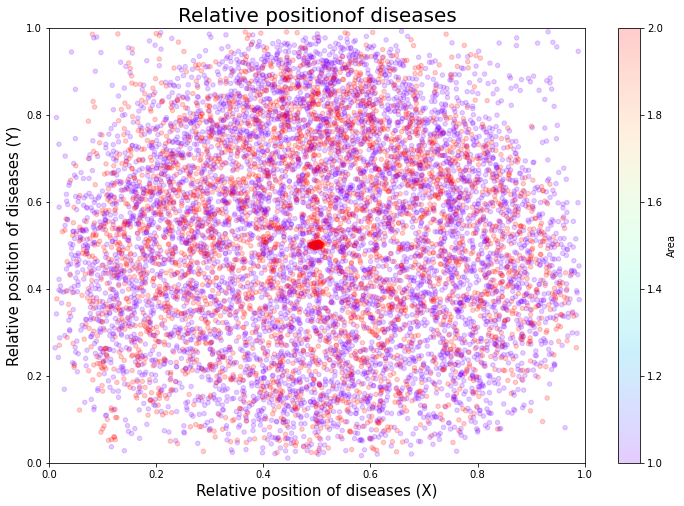

In [235]:
# Bbox 위치의 분포 (과수별)
figsize = (12,8)
plt.figure(figsize=figsize)
plt.scatter(part_middlex_flat,part_middley_flat, c = part_size_task_C, cmap='rainbow',alpha = 0.2, s= 20)
plt.colorbar(label = 'Area')
plt.xlabel('Relative position of diseases (X)', fontsize=15)
plt.ylabel('Relative position of diseases (Y)', fontsize=15)
plt.title("Relative positionof diseases", fontsize=20) 
plt.xlim([0, 1]) 
plt.ylim([0, 1])
plt.show()


In [258]:
part1_middlex_flat= []
part1_middley_flat= []
part1_size_crop_C = []
part1_size_risk_C = []
part1_size_disease_C = []
part1_size_area_C = []
part1_size_grow_C = []
part1_size_task_C = []

for filepath in tqdm(paprika):
   tmp_json = json.load(open(glob(filepath +'//*.json')[0], 'r'))
   tmp_img = cv2.imread(glob(filepath +'//*.jpg')[0])
   tmp_csv = pd.read_csv(glob(filepath +'//*.csv')[0])
   points = tmp_json['annotations']['bbox'][0]
   part1_points = tmp_json['annotations']['part']

   for point in part1_points:
      if len(point) != 0:
         part1_middlex_flat.append((point['x']-points['x']+0.5*point['w'])/points['w'])
         part1_middley_flat.append((point['y']-points['y']+0.5*point['h'])/points['h'])
         part1_size_crop_C.append(crop_labels.index(tmp_json['annotations']['crop']))
         part1_size_risk_C.append(risk_labels.index(tmp_json['annotations']['risk']))
         part1_size_disease_C.append(disease_labels.index(tmp_json['annotations']['disease']))
         part1_size_area_C.append(area_labels.index(tmp_json['annotations']['area']))
         part1_size_grow_C.append(grow_labels.index(tmp_json['annotations']['grow']))
         part1_size_task_C.append(task_labels.index(tmp_json['description']['task']))


100%|██████████| 2101/2101 [00:51<00:00, 40.44it/s]


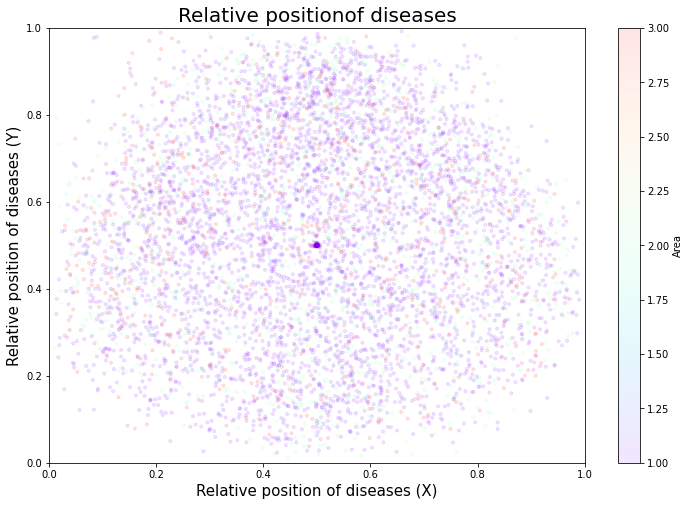

In [263]:
# Bbox 위치의 분포 (과수별)
figsize = (12,8)
plt.figure(figsize=figsize)
plt.scatter(part1_middlex_flat,part1_middley_flat, c = part1_size_risk_C, cmap='rainbow',alpha = 0.1, s= 10)
plt.colorbar(label = 'Area')
plt.xlabel('Relative position of diseases (X)', fontsize=15)
plt.ylabel('Relative position of diseases (Y)', fontsize=15)
plt.title("Relative positionof diseases", fontsize=20) 
plt.xlim([0, 1]) 
plt.ylim([0, 1])
plt.show()


In [107]:
straw = filter_list(train, 'annotations', 'crop', 1)
tomato = filter_list(train, 'annotations', 'crop', 2)
paprika = filter_list(train, 'annotations', 'crop', 3)
cucum = filter_list(train, 'annotations', 'crop', 4)
pepper = filter_list(train, 'annotations', 'crop', 5)
grape = filter_list(train, 'annotations', 'crop', 6)

100%|██████████| 5767/5767 [02:20<00:00, 41.14it/s]


In [39]:
tomato = filter_list(train, 'annotations', 'crop', 2)

100%|██████████| 5767/5767 [02:25<00:00, 39.58it/s]


In [264]:
part_size_crop_C = []
part_size_risk_C = []
part_size_disease_C = []
part_size_area_C = []
part_size_grow_C = []
part_size_task_C = []
size_crop_C = []
size_risk_C = []
size_disease_C = []
size_area_C = []
size_grow_C = []
size_task_C = []
part_ratiox_flat= []
part_ratioy_flat= []
ratio_x = []
ratio_y = []
part_ratiox = []
part_ratioy = []


for filepath in tqdm(train):
   tmp_json = json.load(open(glob(filepath +'//*.json')[0], 'r'))
   tmp_img = cv2.imread(glob(filepath +'//*.jpg')[0])
   tmp_csv = pd.read_csv(glob(filepath +'//*.csv')[0])
   points = tmp_json['annotations']['bbox'][0]
   part_points = tmp_json['annotations']['part']
   ratio_x.append(points['w']/tmp_img.shape[1])
   ratio_y.append(points['h']/tmp_img.shape[0])
   size_crop_C.append(crop_labels.index(tmp_json['annotations']['crop']))
   size_risk_C.append(risk_labels.index(tmp_json['annotations']['risk']))
   size_disease_C.append(disease_labels.index(tmp_json['annotations']['disease']))
   size_area_C.append(area_labels.index(tmp_json['annotations']['area']))
   size_grow_C.append(grow_labels.index(tmp_json['annotations']['grow']))
   size_task_C.append(task_labels.index(tmp_json['description']['task']))

   tmp_ratio_x = []
   tmp_ratio_y = []

   for point in part_points:
      if len(point) != 0:
         part_ratiox_flat.append(point['w']/points['w'])   
         part_ratioy_flat.append(point['h']/points['h'])
         tmp_ratio_x.append(point['w']/points['w'])
         tmp_ratio_y.append(point['h']/points['h'])
         part_size_crop_C.append(crop_labels.index(tmp_json['annotations']['crop']))
         part_size_risk_C.append(risk_labels.index(tmp_json['annotations']['risk']))
         part_size_disease_C.append(disease_labels.index(tmp_json['annotations']['disease']))
         part_size_area_C.append(area_labels.index(tmp_json['annotations']['area']))
         part_size_grow_C.append(grow_labels.index(tmp_json['annotations']['grow']))
         part_size_task_C.append(task_labels.index(tmp_json['description']['task']))


   part_ratiox.append(tmp_ratio_x)
   part_ratioy.append(tmp_ratio_y)



100%|██████████| 5767/5767 [02:34<00:00, 37.40it/s]


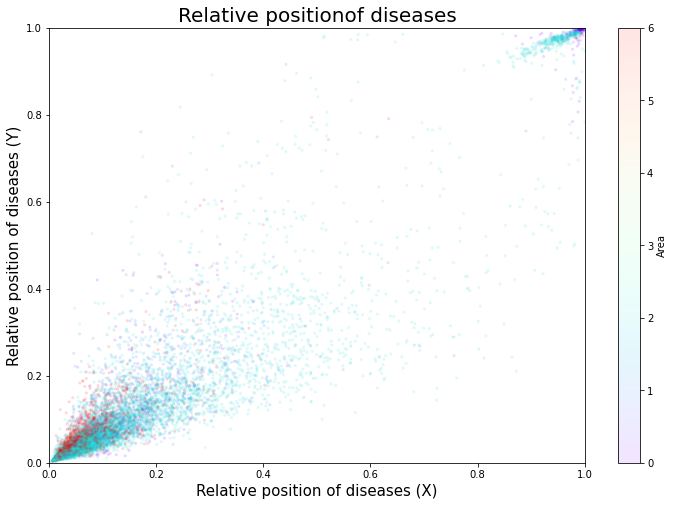

In [274]:
# Bbox 위치의 분포 (과수별)
figsize = (12,8)
plt.figure(figsize=figsize)
plt.scatter(part_ratiox_flat, part_ratioy_flat, c = part_size_grow_C, cmap='rainbow',alpha = 0.1, s= 5)
plt.colorbar(label = 'Area')
plt.xlabel('Relative position of diseases (X)', fontsize=15)
plt.ylabel('Relative position of diseases (Y)', fontsize=15)
plt.title("Relative positionof diseases", fontsize=20) 
plt.xlim([0, 1]) 
plt.ylim([0, 1])
plt.show()


In [282]:
part1_size1_crop_C = []
part1_size1_risk_C = []
part1_size1_disease_C = []
part1_size1_area_C = []
part1_size1_grow_C = []
part1_size1_task_C = []
size1_crop_C = []
size1_risk_C = []
size1_disease_C = []
size1_area_C = []
size1_grow_C = []
size1_task_C = []
part1_ratiox_flat= []
part1_ratioy_flat= []
ratio1_x = []
ratio1_y = []
part1_ratiox = []
part1_ratioy = []


for filepath in tqdm(paprika):
   tmp_json = json.load(open(glob(filepath +'//*.json')[0], 'r'))
   tmp_img = cv2.imread(glob(filepath +'//*.jpg')[0])
   tmp_csv = pd.read_csv(glob(filepath +'//*.csv')[0])
   points = tmp_json['annotations']['bbox'][0]
   part1_points = tmp_json['annotations']['part']
   ratio1_x.append(points['w']/tmp_img.shape[1])
   ratio1_y.append(points['h']/tmp_img.shape[0])
   size1_crop_C.append(crop_labels.index(tmp_json['annotations']['crop']))
   size1_risk_C.append(risk_labels.index(tmp_json['annotations']['risk']))
   size1_disease_C.append(disease_labels.index(tmp_json['annotations']['disease']))
   size1_area_C.append(area_labels.index(tmp_json['annotations']['area']))
   size1_grow_C.append(grow_labels.index(tmp_json['annotations']['grow']))
   size1_task_C.append(task_labels.index(tmp_json['description']['task']))

   tmp_ratio1_x = []
   tmp_ratio1_y = []

   for point in part1_points:
      if len(point) != 0:
         part1_ratiox_flat.append(point['w']/points['w'])   
         part1_ratioy_flat.append(point['h']/points['h'])
         tmp_ratio1_x.append(point['w']/points['w'])
         tmp_ratio1_y.append(point['h']/points['h'])
         part1_size1_crop_C.append(crop_labels.index(tmp_json['annotations']['crop']))
         part1_size1_risk_C.append(risk_labels.index(tmp_json['annotations']['risk']))
         part1_size1_disease_C.append(disease_labels.index(tmp_json['annotations']['disease']))
         part1_size1_area_C.append(area_labels.index(tmp_json['annotations']['area']))
         part1_size1_grow_C.append(grow_labels.index(tmp_json['annotations']['grow']))
         part1_size1_task_C.append(task_labels.index(tmp_json['description']['task']))


   part1_ratiox.append(tmp_ratio1_x)
   part1_ratioy.append(tmp_ratio1_y)



100%|██████████| 2101/2101 [00:52<00:00, 40.17it/s]


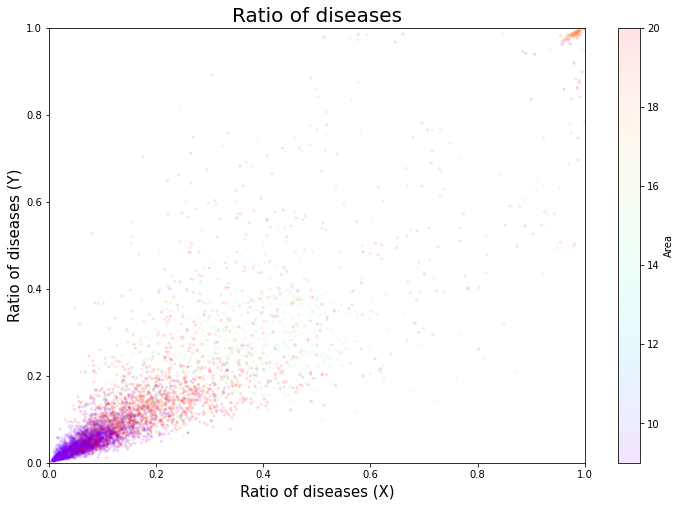

In [286]:
# Bbox 위치의 분포 (과수별)
figsize = (12,8)
plt.figure(figsize=figsize)
plt.scatter(part1_ratiox_flat, part1_ratioy_flat, c = part1_size1_disease_C, cmap='rainbow',alpha = 0.1, s= 5)
plt.colorbar(label = 'Area')
plt.xlabel('Ratio of diseases (X)', fontsize=15)
plt.ylabel('Ratio of diseases (Y)', fontsize=15)
plt.title("Ratio of diseases", fontsize=20) 
plt.xlim([0, 1]) 
plt.ylim([0, 1])
plt.show()


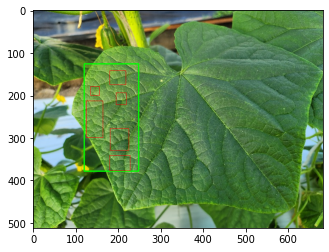

In [117]:
plt.imshow(img_show(tmp_json,tmp_img))

In [103]:
part_sizex_flat= []
part_sizey_flat= []

size_crop_C = []
size_risk_C = []
size_disease_C = []
size_area_C = []
size_grow_C = []
size_task_C = []


for filepath in tqdm(train):
   tmp_json = json.load(open(glob(filepath +'//*.json')[0], 'r'))
   tmp_img = cv2.imread(glob(filepath +'//*.jpg')[0])
   tmp_csv = pd.read_csv(glob(filepath +'//*.csv')[0])
   points = tmp_json['annotations']['bbox'][0]
   part_points = tmp_json['annotations']['part']
   for point in part_points:
      if len(point) != 0:
         part_sizex_flat.append(point['w'])   
         part_sizey_flat.append(point['h'])
         size_crop_C.append(crop_labels.index(tmp_json['annotations']['crop']))
         size_risk_C.append(risk_labels.index(tmp_json['annotations']['risk']))
         size_disease_C.append(disease_labels.index(tmp_json['annotations']['disease']))
         size_area_C.append(area_labels.index(tmp_json['annotations']['area']))
         size_grow_C.append(grow_labels.index(tmp_json['annotations']['grow']))
         size_task_C.append(task_labels.index(tmp_json['description']['task']))


100%|██████████| 5767/5767 [02:32<00:00, 37.76it/s]


In [ ]:
# Bbox 위치의 분포 (과수별)
figsize = (12,8)
plt.figure(figsize=figsize)
plt.scatter(part_ratiox_flat, part_ratioy_flat, c = part_size_grow_C, cmap='rainbow',alpha = 0.1, s= 5)
plt.colorbar(label = 'Area')
plt.xlabel('Relative position of diseases (X)', fontsize=15)
plt.ylabel('Relative position of diseases (Y)', fontsize=15)
plt.title("Relative positionof diseases", fontsize=20) 
plt.xlim([0, 1]) 
plt.ylim([0, 1])
plt.show()


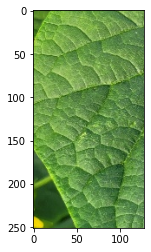

In [116]:
# crop test
points = tmp_json['annotations']['bbox'][0]
cropped_img = tmp_img[int(points['y']):int(points['y'])+int(points['h']), int(points['x']):int(points['x'])+int(points['w'])]
cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)


In [118]:
R = np.mean(cropped_img[:,:,0][0])
G = np.mean(cropped_img[:,:,1][0])
B = np.mean(cropped_img[:,:,2][0])
print((R, G, B))

(102.5859375, 153.421875, 64.7578125)


In [311]:
color_r_avg = []
color_g_avg = []
color_b_avg = []
part_color_r_avg = []
part_color_g_avg = []
part_color_b_avg = []
part_color_r_avg_flat = []
part_color_g_avg_flat = []
part_color_b_avg_flat = []

size_crop_C = []
size_risk_C = []
size_disease_C = []
size_area_C = []
size_grow_C = []
size_task_C = []


for filepath in tqdm(train):
   tmp_json = json.load(open(glob(filepath +'//*.json')[0], 'r'))
   tmp_img = cv2.imread(glob(filepath +'//*.jpg')[0])
   tmp_csv = pd.read_csv(glob(filepath +'//*.csv')[0])
   points = tmp_json['annotations']['bbox'][0]
   part_points = tmp_json['annotations']['part']
   cropped_img = tmp_img[int(points['y']):int(points['y'])+int(points['h']), int(points['x']):int(points['x'])+int(points['w'])]
   R = np.mean(cropped_img[:,:,0][0])
   G = np.mean(cropped_img[:,:,1][0])
   B = np.mean(cropped_img[:,:,2][0])
   color_r_avg.append(R)
   color_g_avg.append(G)
   color_b_avg.append(B)
   tmp_color_r = []
   tmp_color_g = []
   tmp_color_b = []

   for point in part_points:
      if len(point) != 0:
         cropped_img = tmp_img[int(point['y']):int(point['y'])+int(point['h']), int(point['x']):int(point['x'])+int(point['w'])]
         R = np.mean(cropped_img[:,:,0][0])
         G = np.mean(cropped_img[:,:,1][0])
         B = np.mean(cropped_img[:,:,2][0])
         part_color_r_avg_flat.append(R)   
         part_color_g_avg_flat.append(G)
         part_color_b_avg_flat.append(B)
         tmp_color_r.append(R)   
         tmp_color_g.append(G)
         tmp_color_b.append(B)
   size_crop_C.append(crop_labels.index(tmp_json['annotations']['crop']))
   size_risk_C.append(risk_labels.index(tmp_json['annotations']['risk']))
   size_disease_C.append(disease_labels.index(tmp_json['annotations']['disease']))
   size_area_C.append(area_labels.index(tmp_json['annotations']['area']))
   size_grow_C.append(grow_labels.index(tmp_json['annotations']['grow']))
   size_task_C.append(task_labels.index(tmp_json['description']['task']))
   part_color_r_avg.append(np.mean(tmp_color_r))   
   part_color_g_avg.append(np.mean(tmp_color_g))
   part_color_b_avg.append(np.mean(tmp_color_b))


  0%|          | 0/5767 [00:00<?, ?it/s]c:\Users\YeSeu\byk\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\YeSeu\byk\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\YeSeu\byk\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\YeSeu\byk\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 3/5767 [00:00<03:23, 28.30it/s]c:\Users\YeSeu\byk\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\YeSeu\byk\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_

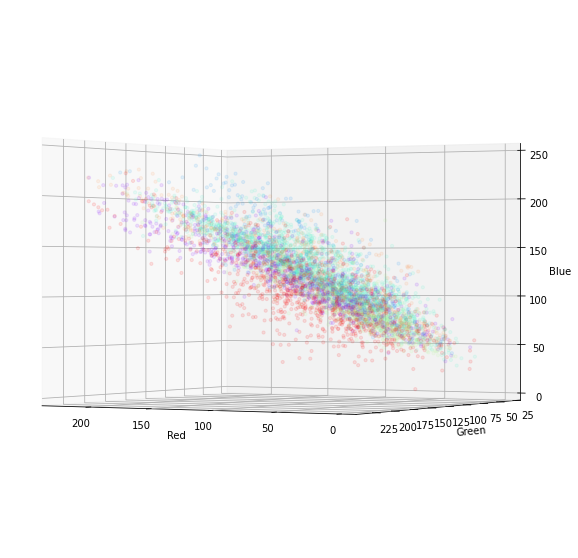

In [318]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from PIL import Image

fig = pyplot.figure(figsize = (10,10))
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

r, g, b = color_r_avg, color_g_avg, color_b_avg

axis.scatter3D(r, g, b, c = size_crop_C, cmap = 'rainbow', marker="o", s = 10, alpha = 0.1)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.view_init(0, 120)

pyplot.show()

In [ ]:
def RGB_avg(list):
  for i, name in enumerate(list):

      tmp = df_data.loc[df_data['label_name']==name]

      R1_avg=[]
      G1_avg=[]
      B1_avg=[]

      R2_avg=[]
      G2_avg=[]
      B2_avg=[]

      for index,col in enumerate(tmp['이미지']):
          path = data+'/train/'+tmp['이미지'].iloc[index].split(".")[0]+'/'+tmp['이미지'].iloc[index]
          img = cv2.imread(path)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          rgb_json = json.load(open(data+'/train/'+tmp['이미지'].iloc[index].split(".")[0]+'/'+tmp['이미지'].iloc[index].split(".")[0]+'.json', 'r'))
          points = rgb_json['annotations']['bbox'][0]
          cropped_img = img[int(points['y']):int(points['y'])+int(points['h']), int(points['x']):int(points['x'])+int(points['w'])]
          cropped_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          
          R1 = np.mean(img[:,:,0][0])
          G1 = np.mean(img[:,:,1][0])
          B1 = np.mean(img[:,:,2][0])

          R1_avg.append(R1)
          G1_avg.append(G1)
          B1_avg.append(B1)

          R2 = np.mean(cropped_img[:,:,0][0])
          G2 = np.mean(cropped_img[:,:,1][0])
          B2 = np.mean(cropped_img[:,:,2][0])

          R2_avg.append(R2)
          G2_avg.append(G2)
          B2_avg.append(B2)

      R1_g_avg = np.mean(R1_avg)
      G1_g_avg = np.mean(G1_avg)
      B1_g_avg = np.mean(B1_avg)

      R2_g_avg = np.mean(R2_avg)
      G2_g_avg = np.mean(G2_avg)
      B2_g_avg = np.mean(B2_avg)

      print(name)
      print('전체 이미지 RGB 색상평균 : ',(R1_g_avg, G1_g_avg, B1_g_avg))
      print('촬영 이미지 RGB 색상평균 : ',(R2_g_avg, G2_g_avg, B1_g_avg))
      print('')
